
--- Starting Analysis for Dataset: FD001 ---


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8096\2482498755.py:186: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.33333333 0.16666667 ... 0.83333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[:, selected_features] = scaler.transform(df_train[selected_features])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8096\2482498755.py:187: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.41666667 0.41666667 ... 0.58333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test.loc[:, selected_features] = scaler.transform(df_test[selected_features])


FD001 Results (RMSE: 16.5659, Score: 646, F1: 0.8936)

--- Generating Visualizations ---


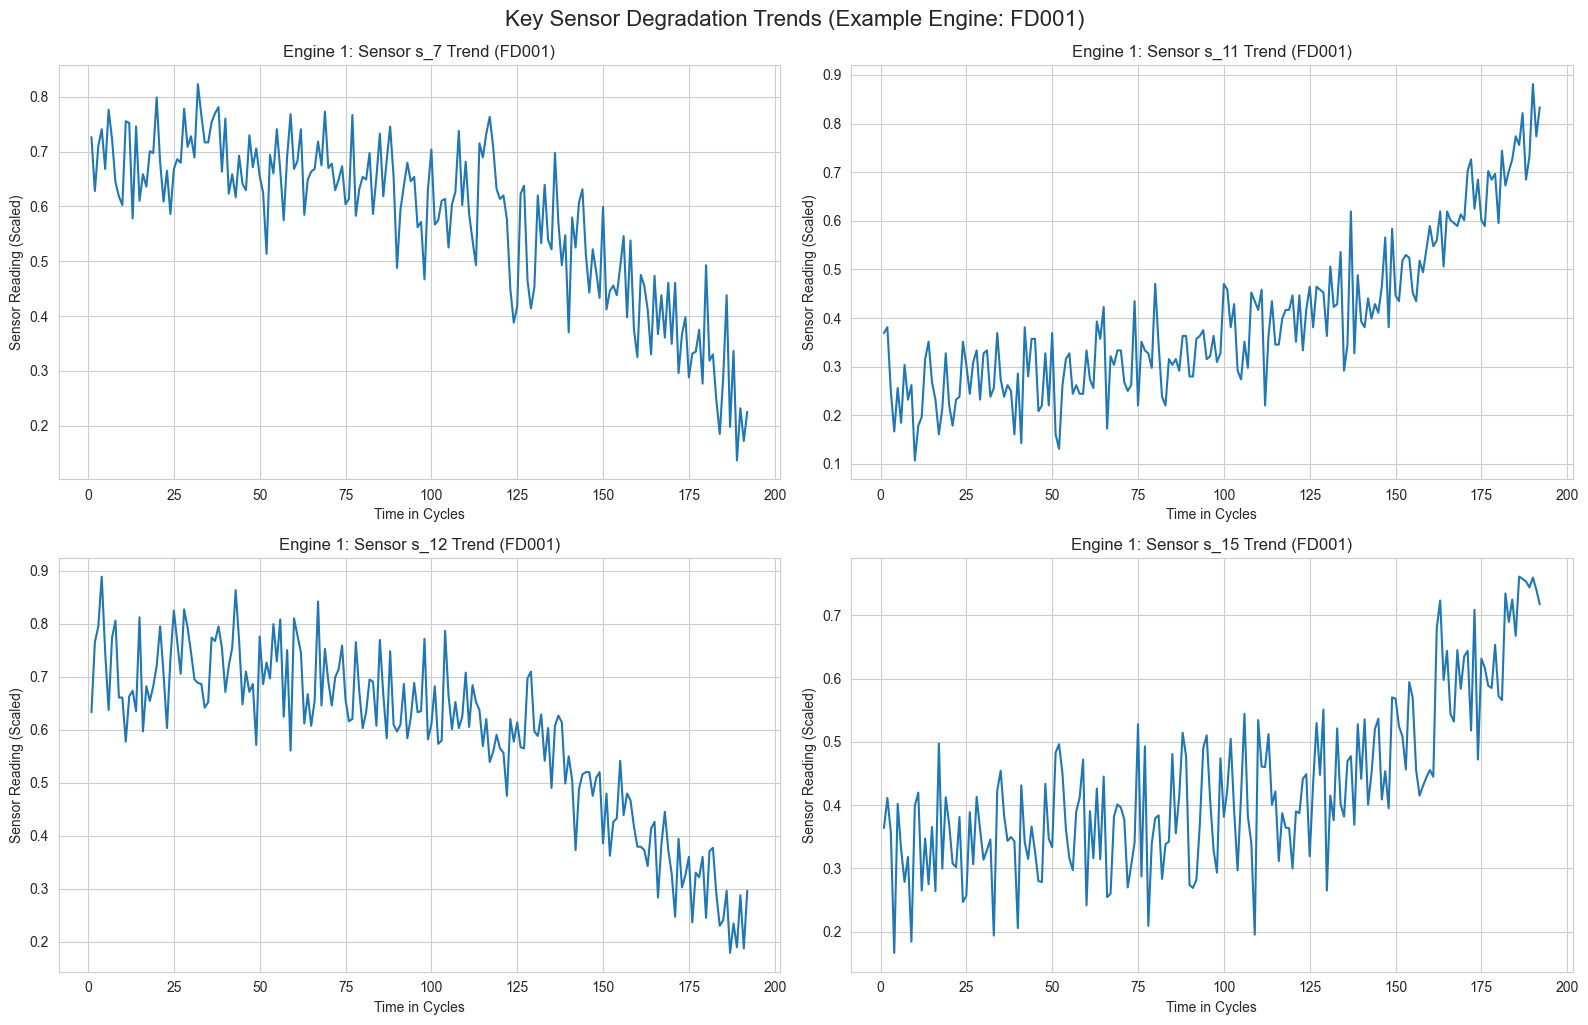

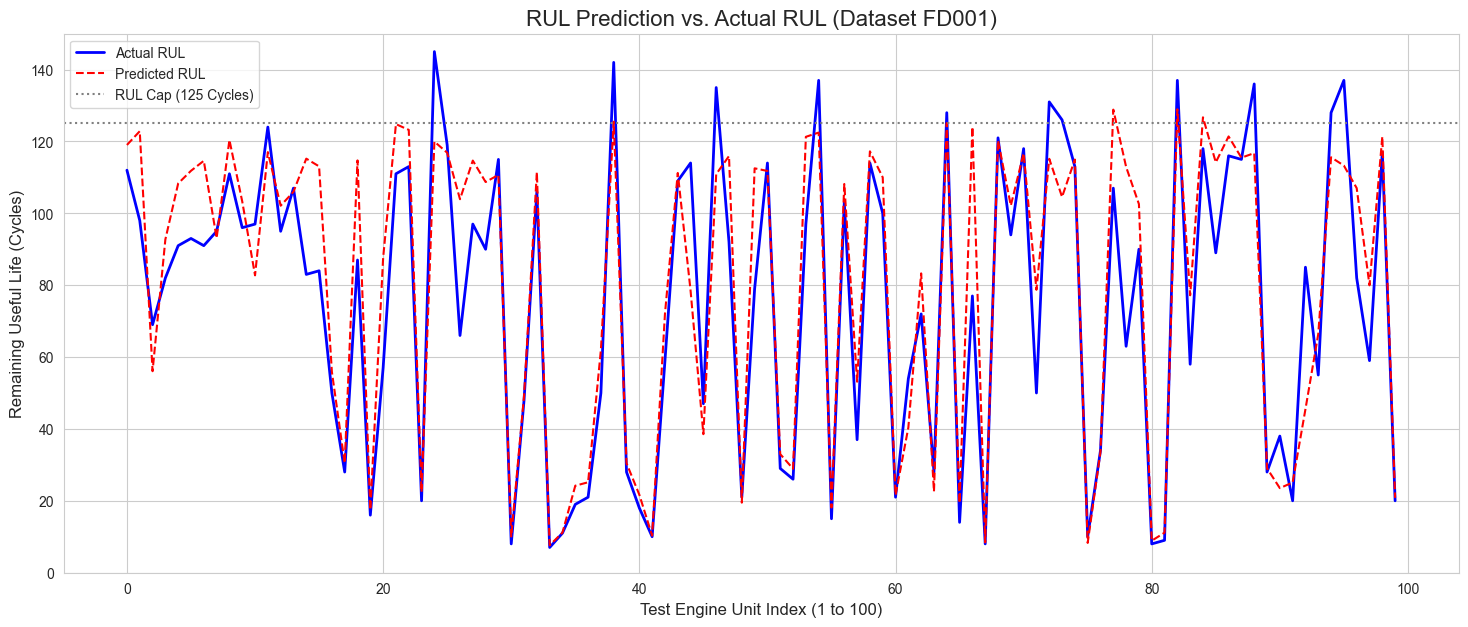


--- FD001 Analysis Complete. Proceed to next cell for FD002 ---

--- Starting Analysis for Dataset: FD002 ---


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8096\2482498755.py:186: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.32291667 0.28125    0.0625     ... 0.07291667 0.08333333 0.36458333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[:, selected_features] = scaler.transform(df_train[selected_features])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8096\2482498755.py:187: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.6875     0.63541667 0.3125     ... 0.29166667 0.9375     0.29166667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test.loc[:, selected_features] = scaler.transform(df_test[selected_features])


FD002 Results (RMSE: 40.6712, Score: 212755, F1: 0.5111)

--- Generating Visualizations ---


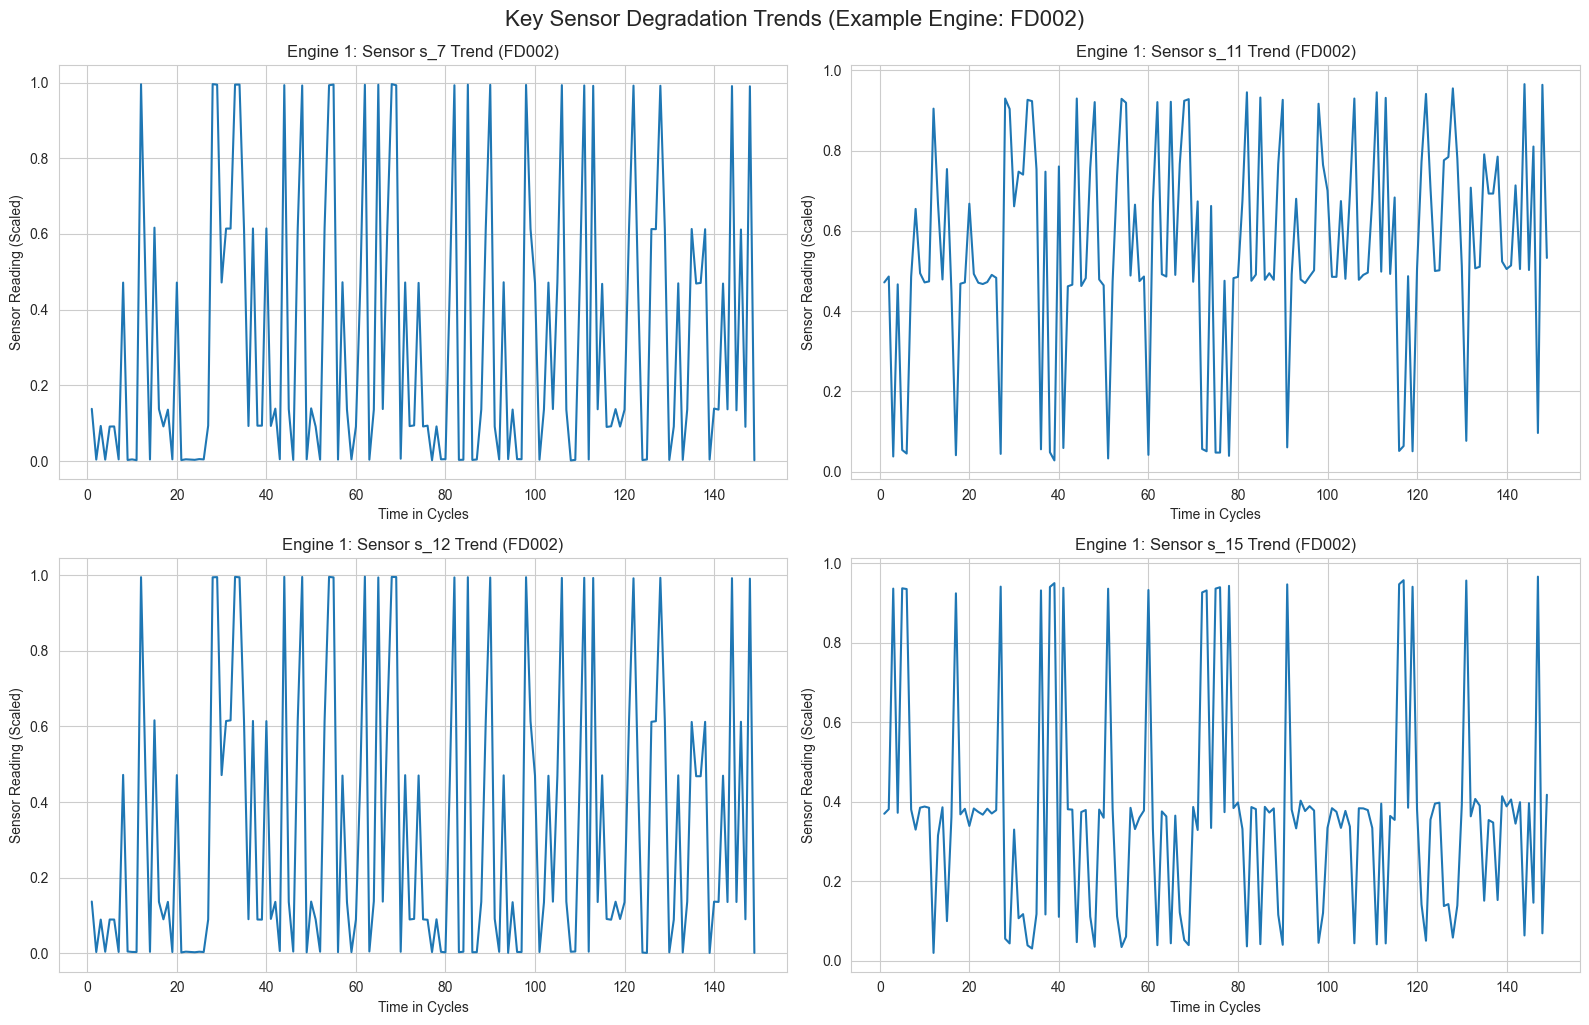

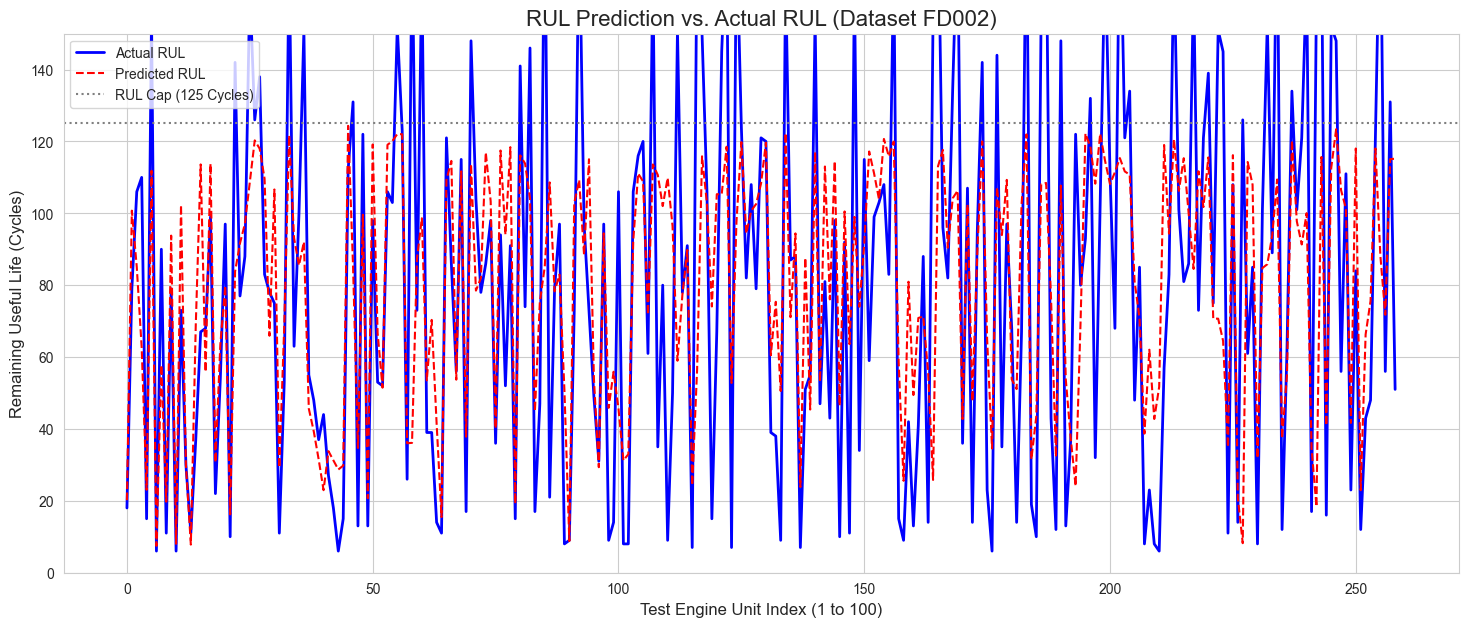


--- FD002 Analysis Complete. Proceed to next cell for FD003 ---

--- Starting Analysis for Dataset: FD003 ---


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8096\2482498755.py:186: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.27272727 0.36363636 0.27272727 ... 0.72727273 0.63636364 0.72727273]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[:, selected_features] = scaler.transform(df_train[selected_features])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8096\2482498755.py:187: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.27272727 0.27272727 0.27272727 ... 0.54545455 0.63636364 0.36363636]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test.loc[:, selected_features] = scaler.transform(df_test[selected_features])


FD003 Results (RMSE: 27.2620, Score: 3351, F1: 0.8649)

--- Generating Visualizations ---


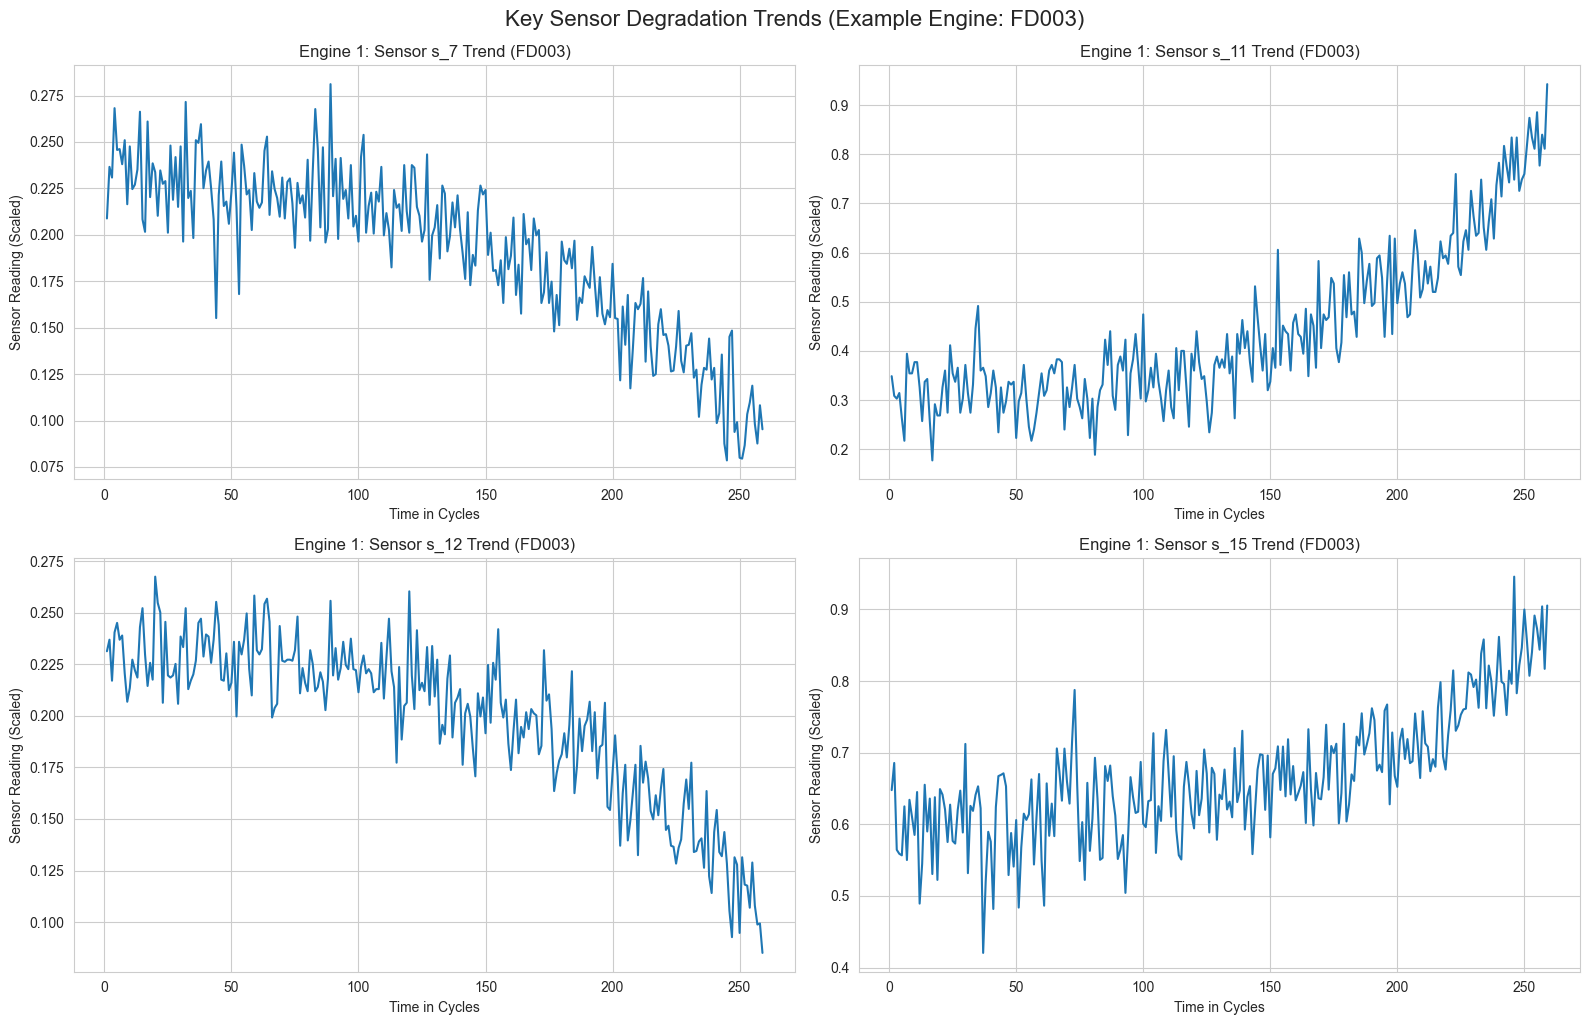

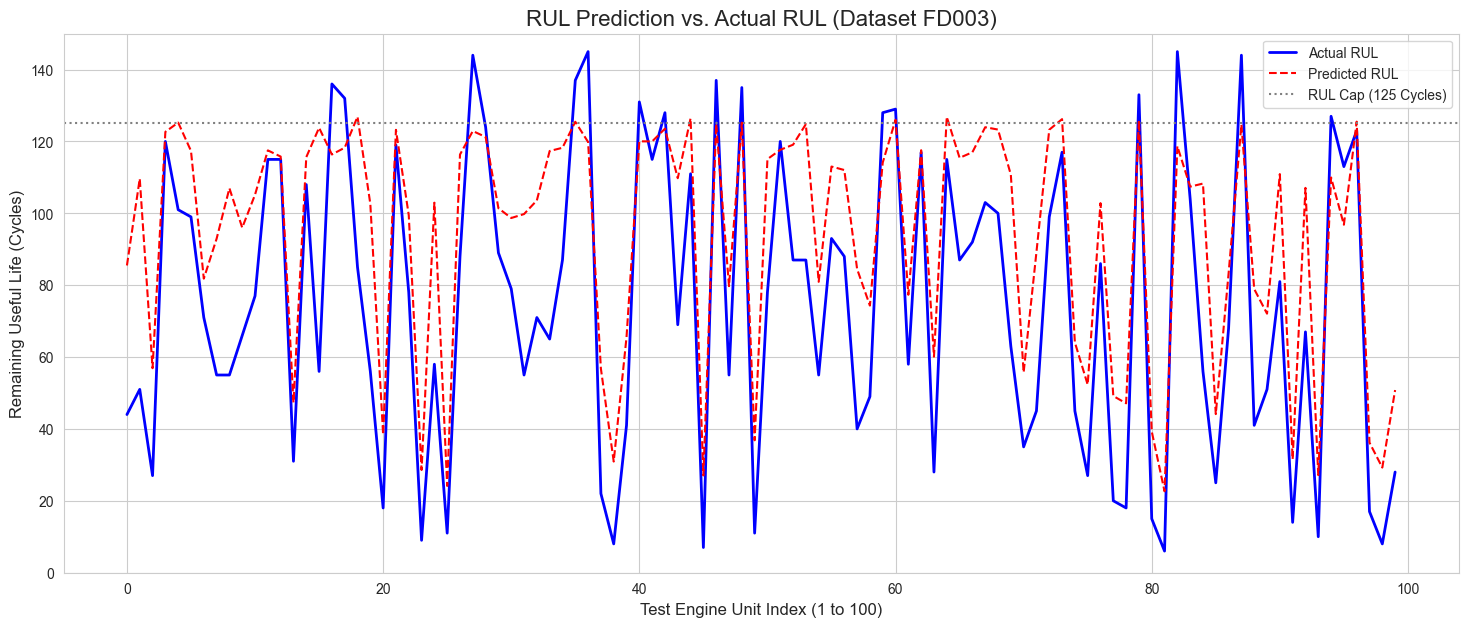


--- FD003 Analysis Complete. Proceed to next cell for FD004 ---

--- Starting Analysis for Dataset: FD004 ---


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8096\2482498755.py:186: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.28865979 0.60824742 0.27835052 ... 0.95876289 0.36082474 0.31958763]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[:, selected_features] = scaler.transform(df_train[selected_features])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8096\2482498755.py:187: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.6185567  0.04123711 0.26804124 ... 0.35051546 0.65979381 0.34020619]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test.loc[:, selected_features] = scaler.transform(df_test[selected_features])


FD004 Results (RMSE: 49.7401, Score: 354449, F1: 0.2812)

--- Generating Visualizations ---


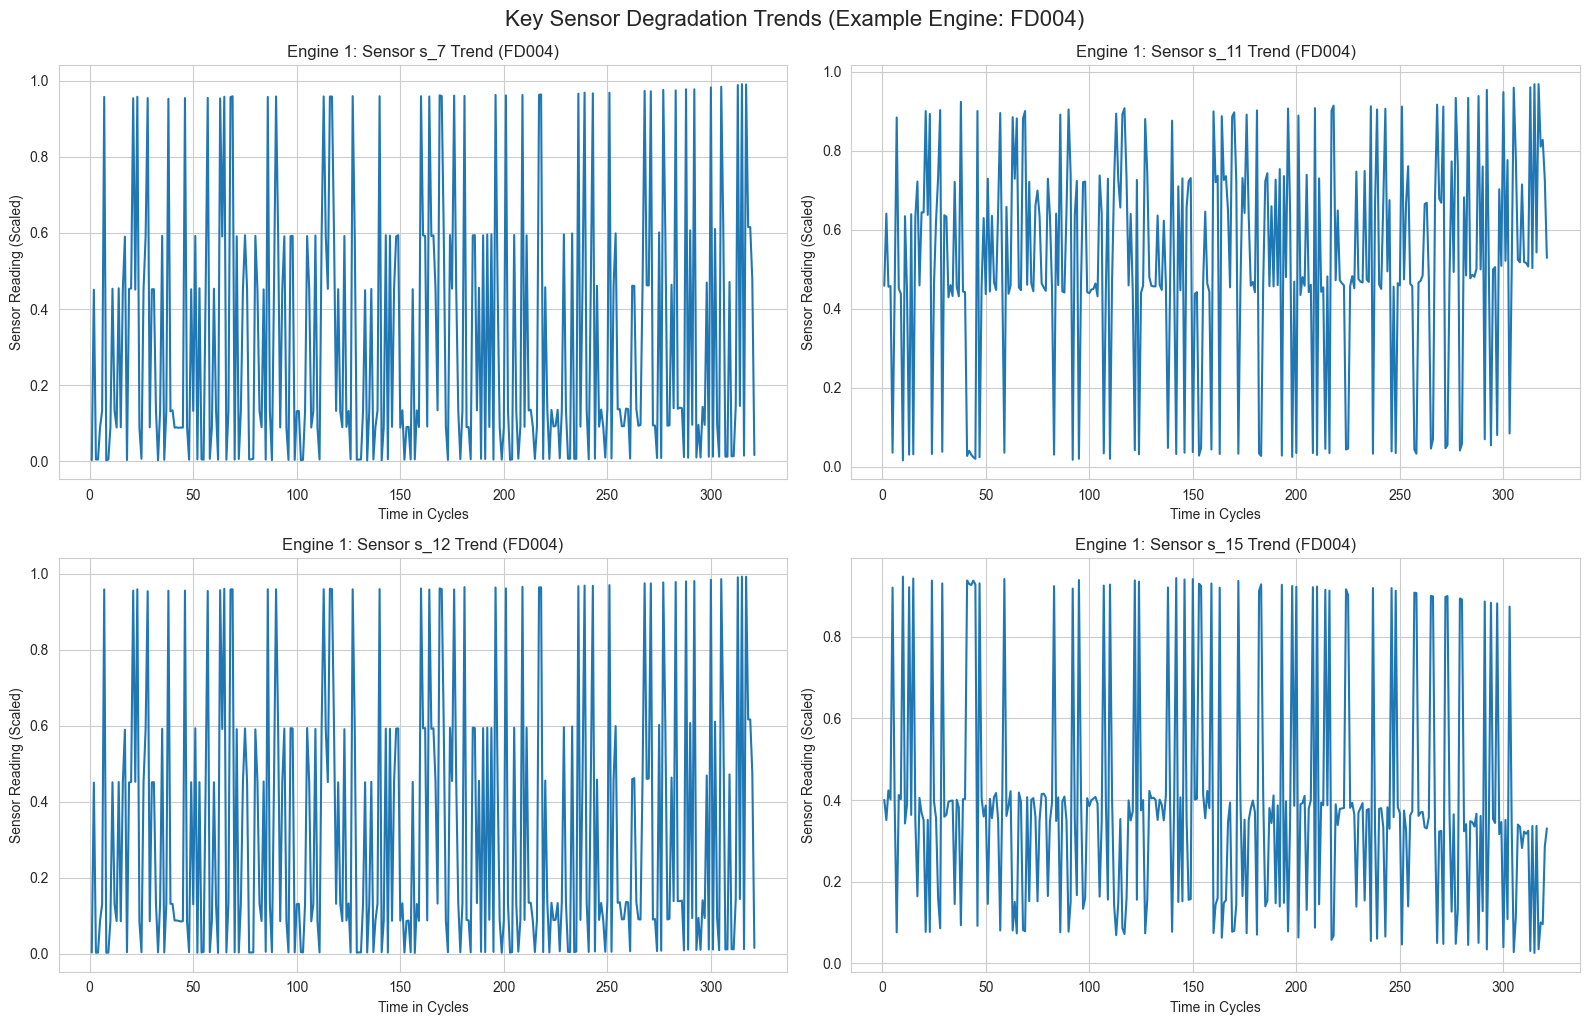

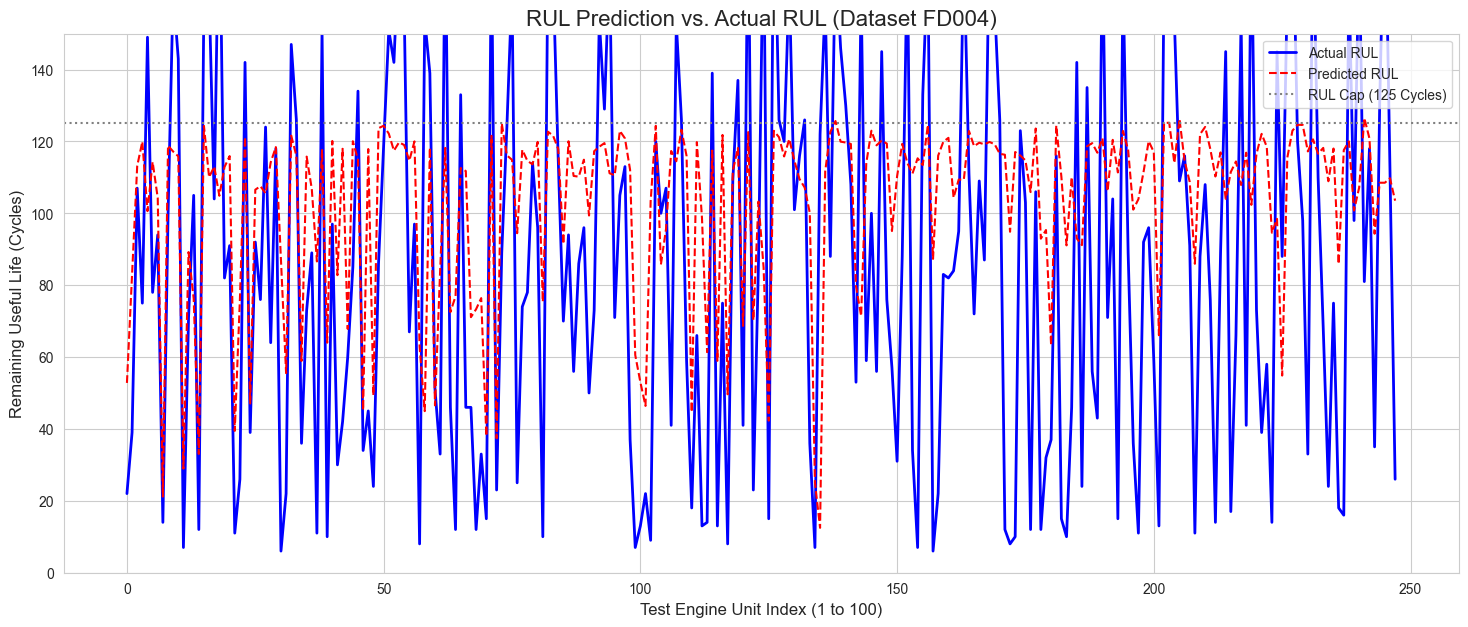


COMPREHENSIVE HYBRID MODEL PERFORMANCE ACROSS C-MAPSS DATASETS
Framework: Autoencoder Anomaly Detection + CNN-LSTM Prognostics
| Dataset   |   RUL RMSE |   C-MAPSS Score |   F1-Score (N=30) |   Precision |   Recall |
|:----------|-----------:|----------------:|------------------:|------------:|---------:|
| FD001     |    16.5659 |             646 |            0.8936 |      0.9545 |   0.84   |
| FD002     |    40.6712 |          212755 |            0.5111 |      0.7931 |   0.377  |
| FD003     |    27.262  |            3351 |            0.8649 |      0.9412 |   0.8    |
| FD004     |    49.7401 |          354449 |            0.2812 |      0.8182 |   0.1698 |


In [1]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping

# Suppress pandas warnings
pd.options.mode.chained_assignment = None
sns.set_style("whitegrid")

# --- GLOBAL CONSTANTS ---
SEQUENCE_LENGTH = 30
RUL_CAP = 125
FAILURE_THRESHOLD_N = 30 
# NOTE: BASE_DIR corrected to use only the directory path
BASE_DIR = r'C:\\Users\\LENOVO\\Downloads\\turbofan project\\Datas' 
ALL_RESULTS = []

# --- CORE FUNCTIONS (Model Builders and Utilities) ---
def get_selected_features(dataset_name):
    sensor_names = ['s_{}'.format(i) for i in range(1, 22)]
    setting_names = ['setting_1', 'setting_2', 'setting_3']
    irrelevant_sensors = ['s_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']
    features_to_keep = [f for f in sensor_names if f not in irrelevant_sensors]
    if dataset_name in ['FD002', 'FD004']:
        features_to_keep.extend(setting_names)
    return features_to_keep

def calculate_RUL(df):
    max_cycles_df = df.groupby('unit_number')['time_cycles'].max().reset_index()
    df = df.merge(max_cycles_df, on='unit_number', how='left', suffixes=['', '_max'])
    df['RUL'] = df['time_cycles_max'] - df['time_cycles']
    df['RUL_capped'] = np.where(df['RUL'] > RUL_CAP, RUL_CAP, df['RUL'])
    df.drop('time_cycles_max', axis=1, inplace=True)
    return df

def create_sequences(df, sequence_length, features, label_column=None):
    X, y = [], []
    for engine_id in df['unit_number'].unique():
        engine_data = df[df['unit_number'] == engine_id][features].values
        if label_column:
            RUL_labels = df[df['unit_number'] == engine_id][label_column].values
        for i in range(len(engine_data) - sequence_length + 1):
            sequence = engine_data[i:i + sequence_length]
            X.append(sequence)
            if label_column:
                y.append(RUL_labels[i + sequence_length - 1])
    return np.array(X), np.array(y) if label_column else np.array(X)

def cmapss_score(y_true, y_pred):
    d = y_pred - y_true
    score = np.where(d < 0, np.exp(-d / 13) - 1, np.exp(d / 10) - 1)
    return np.sum(score)

def get_reconstruction_error(model, X_data):
    X_data_np = np.ascontiguousarray(np.asarray(X_data, dtype=np.float32))
    if X_data_np.ndim > 3:
        X_data_np = X_data_np.reshape(-1, X_data_np.shape[-2], X_data_np.shape[-1])
    if X_data_np.ndim == 2:
        X_data_np = np.expand_dims(X_data_np, axis=0)
    X_tensor = keras.backend.constant(X_data_np)
    X_pred = model(X_tensor, training=False).numpy()
    return np.mean(np.square(X_data_np - X_pred), axis=(1, 2))

def build_autoencoder(seq_len, n_features):
    input_layer = Input(shape=(seq_len, n_features))
    encoded = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
    encoded = MaxPooling1D(2, padding='same')(encoded)
    encoded = Conv1D(16, 3, activation='relu', padding='same')(encoded)
    unflattened_shape = encoded.shape[1:]
    encoded = Flatten()(encoded)
    latent_space = Dense(8, activation='relu')(encoded)
    decoded = Dense(np.prod(unflattened_shape), activation='relu')(latent_space)
    decoded = keras.layers.Reshape(unflattened_shape)(decoded) 
    decoded = Conv1D(16, 3, activation='relu', padding='same')(decoded)
    decoded = keras.layers.UpSampling1D(2)(decoded)
    decoded = Conv1D(32, 3, activation='relu', padding='same')(decoded)
    reconstruction = Conv1D(n_features, 3, activation='sigmoid', padding='same')(decoded)
    ae = Model(inputs=input_layer, outputs=reconstruction)
    ae.compile(optimizer='adam', loss='mse')
    return ae

def build_cnn_lstm_regression(seq_len, n_features_enriched):
    input_layer = Input(shape=(seq_len, n_features_enriched))
    conv = Conv1D(64, 5, activation='relu', padding='causal')(input_layer)
    pool = MaxPooling1D(2)(conv)
    dropout_1 = Dropout(0.2)(pool)
    lstm = LSTM(100, return_sequences=False)(dropout_1)
    dropout_2 = Dropout(0.2)(lstm)
    dense_2 = Dense(50, activation='relu', name='dense_2')(dropout_2)
    rul_output = Dense(1, activation='linear', name='rul_regression')(dense_2)
    model = Model(inputs=input_layer, outputs=rul_output)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def adapt_to_classification(regression_model):
    classification_input = regression_model.get_layer('dense_2').output
    failure_output = Dense(1, activation='sigmoid', name='failure_classification')(classification_input)
    class_model = Model(inputs=regression_model.input, outputs=failure_output)
    class_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
    return class_model

# --- PLOTTING FUNCTIONS ---
def plot_degradation_profile(df_to_plot, unit_number, dataset_name):
    """Plots the trend of key sensors for a single engine unit."""
    import matplotlib.pyplot as plt
    KEY_SENSORS = ['s_7', 's_11', 's_12', 's_15'] 
    engine_data = df_to_plot[df_to_plot['unit_number'] == unit_number]
    plot_df = engine_data[['time_cycles'] + KEY_SENSORS].set_index('time_cycles')

    plt.figure(figsize=(16, 10))
    for i, sensor in enumerate(KEY_SENSORS):
        plt.subplot(2, 2, i + 1)
        plt.plot(plot_df.index, plot_df[sensor], label=f'Sensor {sensor}')
        plt.title(f'Engine {unit_number}: Sensor {sensor} Trend ({dataset_name})')
        plt.xlabel('Time in Cycles')
        plt.ylabel('Sensor Reading (Scaled)')
        plt.grid(True)
    
    plt.tight_layout()
    plt.suptitle(f"Key Sensor Degradation Trends (Example Engine: {dataset_name})", y=1.02, fontsize=16)
    plt.show()

def plot_rul_results(y_true, y_pred, dataset_name):
    """Plots actual RUL vs. Predicted RUL for all test engines."""
    import matplotlib.pyplot as plt
    engine_indices = range(len(y_true))
    
    plt.figure(figsize=(18, 7))
    plt.plot(engine_indices, y_true, label='Actual RUL', color='blue', linewidth=2)
    plt.plot(engine_indices, y_pred, label='Predicted RUL', color='red', linestyle='--', linewidth=1.5)
    
    plt.axhline(y=125, color='gray', linestyle=':', label='RUL Cap (125 Cycles)')
    
    plt.title(f'RUL Prediction vs. Actual RUL (Dataset {dataset_name})', fontsize=16)
    plt.xlabel('Test Engine Unit Index (1 to 100)', fontsize=12)
    plt.ylabel('Remaining Useful Life (Cycles)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.ylim(0, 150)
    plt.show()


# =========================================================================
# === MAIN EXECUTION PIPELINE FUNCTION (Corrected) ===
# =========================================================================

def run_full_analysis(dataset_name):
    print(f"\n--- Starting Analysis for Dataset: {dataset_name} ---")

    # Define columns
    index_names = ['unit_number', 'time_cycles']
    col_names = index_names + ['setting_1', 'setting_2', 'setting_3'] + ['s_{}'.format(i) for i in range(1, 22)]

    # 1. LOAD DATA (FIXED: Uses ONLY the dynamic filename joined with BASE_DIR)
    try:
        train_file = os.path.join(BASE_DIR, f'train_{dataset_name}.txt')
        test_file = os.path.join(BASE_DIR, f'test_{dataset_name}.txt')
        rul_file = os.path.join(BASE_DIR, f'RUL_{dataset_name}.txt')
        
        train_df = pd.read_csv(train_file, sep='\s+', header=None, names=col_names)
        test_df = pd.read_csv(test_file, sep='\s+', header=None, names=col_names)
        RUL_truth_df = pd.read_csv(rul_file, sep='\s+', header=None, names=['RUL_truth'])
    except FileNotFoundError:
        print(f"Error: Required file not found for {dataset_name}. Skipping.")
        return None

    # 2. PREPROCESSING
    train_df = calculate_RUL(train_df.copy())

    # 3. ADAPTIVE FEATURE SELECTION
    selected_features = get_selected_features(dataset_name)
    df_train = train_df[['unit_number', 'time_cycles'] + selected_features + ['RUL_capped']]
    df_test = test_df[['unit_number', 'time_cycles'] + selected_features]

    # 4. MIN-MAX SCALING
    scaler = MinMaxScaler()
    scaler.fit(df_train[selected_features])
    df_train.loc[:, selected_features] = scaler.transform(df_train[selected_features])
    df_test.loc[:, selected_features] = scaler.transform(df_test[selected_features])

    # 5. SEQUENCE GENERATION
    X_train, y_train_reg = create_sequences(df_train, SEQUENCE_LENGTH, selected_features, label_column='RUL_capped')
    X_test = create_sequences(df_test, SEQUENCE_LENGTH, selected_features)
    
    # --- FINAL DIMENSIONAL FIXES ---
    if isinstance(X_train, tuple) or isinstance(X_train, list): X_train = X_train[0]
    if X_train.ndim == 4: X_train = X_train.reshape(-1, X_train.shape[-2], X_train.shape[-1])
    if isinstance(X_test, tuple) or isinstance(X_test, list): X_test = X_test[0]
    if X_test.ndim == 4: X_test = X_test.reshape(-1, X_test.shape[-2], X_test.shape[-1])
    # -------------------------------
    
    N_FEATURES = X_train.shape[2]
    
    # 6. AUTOENCODER (AE) TRAINING & FEATURE ENRICHMENT
    healthy_indices = np.where(y_train_reg == RUL_CAP)[0]
    X_train_healthy = X_train[healthy_indices]
    
    keras.backend.clear_session()
    ae_model = build_autoencoder(SEQUENCE_LENGTH, N_FEATURES)
    ae_model.fit(X_train_healthy, X_train_healthy, epochs=50, batch_size=128, validation_split=0.1, verbose=0)
    
    train_error = get_reconstruction_error(ae_model, X_train)
    test_error = get_reconstruction_error(ae_model, X_test)
    
    X_train_enriched = np.concatenate([X_train, np.repeat(train_error[:, np.newaxis, np.newaxis], SEQUENCE_LENGTH, axis=1)], axis=2)
    X_test_enriched = np.concatenate([X_test, np.repeat(test_error[:, np.newaxis, np.newaxis], SEQUENCE_LENGTH, axis=1)], axis=2)

    # 7. REGRESSION TRAINING AND EVALUATION
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
    keras.backend.clear_session()
    reg_model = build_cnn_lstm_regression(SEQUENCE_LENGTH, X_train_enriched.shape[2])
    reg_model.fit(X_train_enriched, y_train_reg, epochs=100, batch_size=256, validation_split=0.2, callbacks=[early_stop], verbose=0)
    
    # Evaluation Logic (Last cycle RUL)
    test_df_max_cycles = df_test.groupby('unit_number')['time_cycles'].max()
    start_index = 0
    last_sequences_indices = []
    for max_cycle in test_df_max_cycles.values:
        num_sequences = max_cycle - SEQUENCE_LENGTH + 1
        last_sequences_indices.append(start_index + num_sequences - 1)
        start_index += num_sequences
        
    y_pred_reg = reg_model(np.ascontiguousarray(X_test_enriched, dtype=np.float32), training=False).numpy().flatten()
    y_pred_final_reg = y_pred_reg[last_sequences_indices]
    y_true_final = RUL_truth_df['RUL_truth'].values
    
    rmse = math.sqrt(mean_squared_error(y_true_final, y_pred_final_reg))
    final_score = cmapss_score(y_true_final, y_pred_final_reg)

    # 8. CLASSIFICATION TRAINING AND EVALUATION
    y_train_class = np.where(y_train_reg <= FAILURE_THRESHOLD_N, 1, 0).reshape(-1, 1)
    class_model = adapt_to_classification(reg_model)
    class_model.fit(X_train_enriched, y_train_class, epochs=100, batch_size=256, validation_split=0.2, callbacks=[early_stop], verbose=0)
    
    y_pred_probs = class_model(np.ascontiguousarray(X_test_enriched, dtype=np.float32), training=False).numpy().flatten()
    y_pred_probs_final = y_pred_probs[last_sequences_indices]
    y_pred_class_final = np.where(y_pred_probs_final > 0.5, 1, 0)
    y_true_final_class = np.where(y_true_final <= FAILURE_THRESHOLD_N, 1, 0)
    
    f1 = f1_score(y_true_final_class, y_pred_class_final, zero_division=0)
    precision = precision_score(y_true_final_class, y_pred_class_final, zero_division=0)
    recall = recall_score(y_true_final_class, y_pred_class_final, zero_division=0)
    
    print(f"{dataset_name} Results (RMSE: {rmse:.4f}, Score: {final_score:.0f}, F1: {f1:.4f})")
    
    # --- PLOTTING INTEGRATION ---
    print("\n--- Generating Visualizations ---")
    plot_degradation_profile(df_train, unit_number=1, dataset_name=dataset_name)
    plot_rul_results(y_true_final, y_pred_final_reg, dataset_name)
    
    return {
        'Dataset': dataset_name, 'RUL RMSE': f"{rmse:.4f}", 'C-MAPSS Score': f"{final_score:.0f}",
        'F1-Score (N=30)': f"{f1:.4f}", 'Precision': f"{precision:.4f}", 'Recall': f"{recall:.4f}"
    }

# =========================================================================
# === FINAL EXECUTION BLOCKS (Chained for stability) ===
# =========================================================================

results = []

# --- EXECUTION BLOCK 1: FD001 (Baseline) ---
results.append(run_full_analysis('FD001'))
print("\n--- FD001 Analysis Complete. Proceed to next cell for FD002 ---")

# --- EXECUTION BLOCK 2: FD002 (Multiple Operating Conditions) ---
results.append(run_full_analysis('FD002')) 
print("\n--- FD002 Analysis Complete. Proceed to next cell for FD003 ---") 

# --- EXECUTION BLOCK 3: FD003 (Multiple Fault Modes) ---
results.append(run_full_analysis('FD003')) 
print("\n--- FD003 Analysis Complete. Proceed to next cell for FD004 ---") 

# --- EXECUTION BLOCK 4: FD004 (Highest Complexity) ---
results.append(run_full_analysis('FD004'))

# --- FINAL OUTPUT ---
results_df = pd.DataFrame([r for r in results if r is not None])
print("\n" + "="*80)
print("COMPREHENSIVE HYBRID MODEL PERFORMANCE ACROSS C-MAPSS DATASETS")
print("Framework: Autoencoder Anomaly Detection + CNN-LSTM Prognostics")
print("="*80)
print(results_df.to_markdown(index=False))